___
# PROJETO 1

## <font color='red'>Leonardo Lamounier Lasmar Grotti</font>
___




## <font color='blue'>Aposentaods x Outras pessoas que recebem renda do governo sem ser por trabalho ou aposentadoria x Renda per capita</font>

## Introdução

Descreva aqui a motivação para escolha dos grupos e o que pretende analisar!

Exemplifique identificando uma pesquisa semelhante feita no Brasil ou no exterior que compare uma parcela da população (apossentados, imigrantes, mulheres, jovens) com todo resto. Critique esta pesquisa (que tipo de variáveis usou? Que recurso de estatística descritiva?). Pode ser um artigo de jornal.


    O objetivo desse projeto é analizar um banco de dados e responder a seguinte pergunta: Em quais características certo grupo de aposentados está melhor (ou pior ou igual) do que algum outro grupo de comparação?
    
     O primeiro passo para esse projeto é escolher um segundo grupo para comparar com os aposentados. Depois de um tempo pensando decidi comparar a renda dos aposentados com as de outros grupos que recebiam renda do governo sem ser por trabalho ou aposentadoria, além disso decidi comparar esses dois grupos com a renda per capita do brasil e dividir todos essses grupos pelos seus sexos para ver como os aposentados estão em questão de renda comparados ao Brasil e a outro grupo que recebe auxilío do governo e também se há alguma diferença gerada pelo sexo.

http://www.scielo.br/pdf/ecos/v18n1/07.pdf (pesquisa: Desigualdade da distribuição da renda no Brasil:
a contribuição de aposentadorias e pensões e de outras parcelas do
rendimento domiciliar per capita)

     Essa pesquisa utiliza a PNAD de 2007 para analisar a distribuição do rendimento domiciliar per capita no Brasil, verificando como o rendimento do trabalho, as aposentadorias e pensões, o rendimento de alugueis e outras parcelas do rendimento afetam a desigualdade de renda no Brasil.
    Embora não seja exatamente o tema da minha pesquisa por analisar a renda per capita, a renda dos aposentados e a renda dos pensionistas e compara-las entre si para medir a desigualdade do Brasil ela foi util para mim.
    A pesquisa escolhida tem muitos dados e muitas tabelas então é altamente informativa, no entanto, por ter muitos textos e poucos gráficos essa informação não fica clara em primeira instancia. Ou seja, ela requer um tempo de analise maior para ser entendida, enquanto gráficos trazem essas informações com mais clareza e facilidade.
    Ela também contem muitos calculos e termos técnicos então talvez não seja util para qualquer pessoa que a leia e seja mais focada para pessoas que já tem um conhecimento prévio sobre o assunto.

___
## Análise e Resultados

In [216]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [217]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Asus Pro\Desktop\projeto 1- Ciencia dos dados


In [316]:
#Leitura da base já em formato de DataFrame e extensão .csv de 2014
dados2014 = pd.read_csv('PES2014.csv', sep=',')
dados2014.head()


,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2014,11,15,1,1,2,19,8,1987,...,3,500,3,3,1,2,2,1,500,20160623
1,1,2014,11,15,1,2,4,19,1,1986,...,3,500,3,4,2,NaN,2,1,500,20160623
2,2,2014,11,15,1,3,2,14,5,2013,...,3,500,3,1,NaN,NaN,NaN,NaN,500,20160623
3,3,2014,11,15,2,1,2,8,4,1963,...,2,1150,4,2,1,2,2,1,1150,20160623
4,4,2014,11,15,2,2,4,6,11,1970,...,2,1150,4,3,1,2,2,1,1150,20160623


In [219]:
#Leitura da base já em formato de DataFrame e extensão .csv de 2011
dados2011 = pd.read_csv('PES2011.csv', sep=',')
dados2011.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2011,11,11000000,1,1,2,25,12,1961,49,...,4,1.000000e+12,99,2,1,2,2,1,1.000000e+12,20100000
1,2011,11,11000000,1,2,4,1,4,1978,33,...,4,1.000000e+12,99,6,2,NaN,NaN,2,1.000000e+12,20100000
2,2011,11,11000000,1,3,4,15,6,1996,15,...,4,1.000000e+12,99,3,2,NaN,NaN,2,1.000000e+12,20100000
3,2011,11,11000000,1,4,2,3,12,2001,9,...,4,1.000000e+12,99,2,2,NaN,NaN,2,1.000000e+12,20100000
4,2011,11,11000000,2,1,4,16,10,1959,51,...,4,1.461000e+03,5,4,1,2,2,1,1.461000e+03,20100000


In [220]:
dados2011.shape

(358919, 324)

In [221]:
n=dados2014.shape[0]

___

In [222]:
## divisão dos estados por região
da = pd.DataFrame()
da['regiao'] = dados2011.UF

da.regiao[(dados2014.UF >= 40) & (dados2014.UF < 50)] = 1
da.regiao[(dados2014.UF >= 30) & (dados2014.UF < 40)] = 2
da.regiao[(dados2014.UF >= 50) & (dados2014.UF < 60)] = 3
da.regiao[(dados2014.UF >= 20) & (dados2014.UF < 30)] = 4
da.regiao[(dados2014.UF >= 10) & (dados2014.UF < 20)] = 5


da.regiao.value_counts()
da.regiao = da.regiao.astype('category')
da.regiao.cat.categories = ('Sul','Sudeste','Centro-Oeste','Nordeste','Norte')

In [356]:
#Frequencia relativa das pessoas em cada região em 2011
print ("Regiões")
ut5 = (da.regiao.value_counts()/n*100).round(decimals=1)
print (ut5, "\n")

Regiões
Sudeste         29.4
Nordeste        28.9
Norte           16.0
Sul             15.3
Centro-Oeste     9.4
dtype: float64 



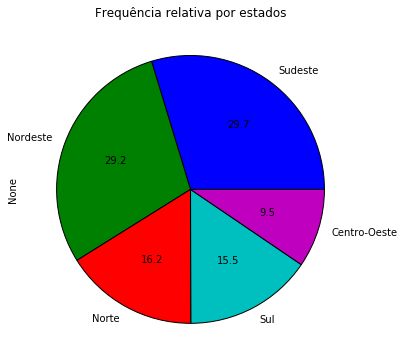

In [274]:
##gráfico de pizza da população pelas 5 regiões brasileiras
plot = ut5.plot(kind='pie',title='Frequência relativa por estados',autopct='%.1f',figsize=(6, 6))

In [371]:
## Variável referente ao sexo
dados2011.V0302.value_counts() 
dados2011.V0302 = dados2011.V0302.astype("category")
dados2011.V0302.cat.categories = ("Masculino","Feminino")

In [391]:
#Frequencia relativa dos sexos em 2011
ut10 = (dados2011.V0302.value_counts()/n*100).round(decimals=1)

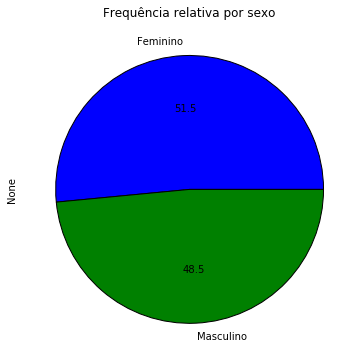

In [373]:
#Gráfico de pizza da populção brasileira separada pelo sexo
plot = ut10.plot(kind='pie',title='Frequência relativa por sexo',autopct='%.1f',figsize=(6, 6))

In [293]:
### Variável referente há existir ou não uma renda diferente do trabalho e aposentadoria
dados2011.V9124.value_counts()
dados2011.V9124 = dados2011.V9124.astype("category")
dados2011.V9124.cat.categories = ("Existe rendimento sem ser por trabalho ou aposentadoria ", "Não existe rendimento sem ser por trabalho ou aposentadoria")

In [393]:
#Tabela cruzada Sexo x Existencia de uma renda diferente do trabalho e aposentadoria
ct12=pd.crosstab(dados2011.V0302,dados2011.V9124,margins=True,rownames=['SEXO'], colnames=['Rendimento'])
ct12

Rendimento,Existe rendimento sem ser por trabalho ou aposentadoria,Não existe rendimento sem ser por trabalho ou aposentadoria,All
SEXO,,,
Masculino,3816,124543,173991
Feminino,6991,127223,184928
All,10807,251766,358919


##Nesse ponto chegamos a nossa primeira conclusão, em que o número de mulheres que recebem renda sem ser por aposentadoria ou travalho é muito maior que o número de homens. No entanto, vale ressaltar que os dois números em relção ao todo são muito pequenos, portanto a diferença em porcentagem (comparando com os que recebem e com os que não recebem) é muito pequena

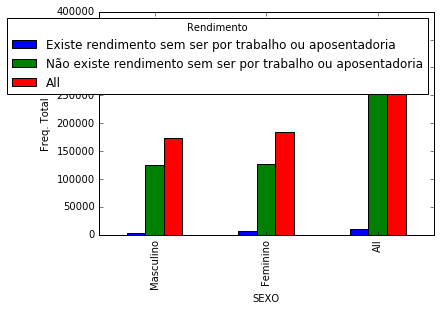

In [394]:
## Passando a tabela acima para um gráfico de barras
plot = ct12.plot(kind='bar')
plt.ylabel('Freq. Total')

In [395]:
## Nesse gráfico fica mais claro que a diferença entre os homens e as mulheres que recebem rendimento sem ser por trabalho não é grande comparado ao número total

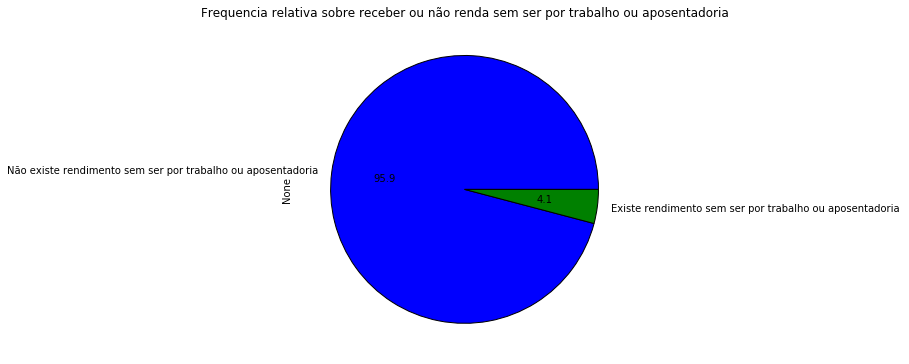

In [296]:
## Gráfico de pizza deixando de lado o sexo e comparando somente o fato da pessoa receber ou não uma renda sem ser por trabalho ou aposentadoria
plot = ut8.plot(kind='pie',title='Frequencia relativa sobre receber ou não renda sem ser por trabalho ou aposentadoria',autopct='%.1f',figsize=(6, 6))

In [396]:
## Com isso fica claro o porque da diferença entre as mulheres e os homens não representarem uma porcentagem alta quando comparada com o todo


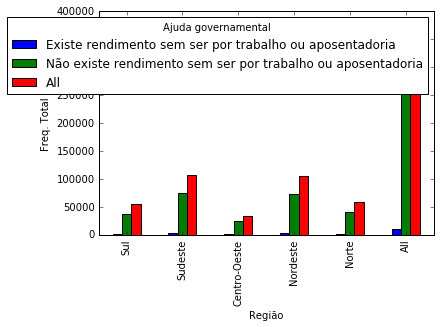

In [298]:
## Separando o gráfico acima (de receber ou não ajuda governamental sem ser de aposentadoria) por regiões 
ct8 = pd.crosstab(da.regiao,a,margins=True,rownames=['Região'], colnames=['Ajuda governamental'])
plot = ct8.plot(kind='bar')
plt.ylabel('Freq. Total')

In [397]:
# Variavel quantitava- renda recebida do governo sem ser por aposentadoria em 2011
faixa_renda4 = np.arange (5,10000,1000)
ren4= pd.cut(dados2011.V1255, faixa_renda4)


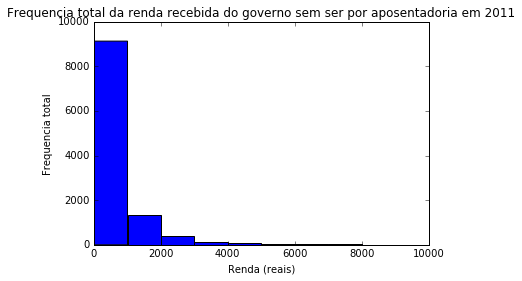

In [299]:
## Histograma da renda recebida do governo sem ser por aposentadoria em 2011
plot = dados2011.V1255.plot.hist(bins=faixa_renda4)
plt.title('Frequencia total da renda recebida do governo sem ser por aposentadoria em 2011')
plt.xlabel('Renda (reais)')
plt.ylabel('Frequencia total')

In [398]:
## Com esse histograma ja percebemos o quão baixo é a média de renda recebida pelas pessoas. Outro fato importante é que por mais que a renda seja baixa, a maioria das pessoas recebem uma renda similar


In [327]:
## V9122 = são aposentados ou não
dados2011.V9122.value_counts()
dados2011.V9122 = dados2014.V9122.astype("category")
dados2011.V9122.cat.categories = ("São aposentados","Não são aposentados")

In [434]:
## Agora estamos analisando as pessoas que são aposentadas
b = dados2011.V9122[~dados2011.V9122.isnull()]
ut9 = (b.value_counts(True)*100).round(decimals=1)

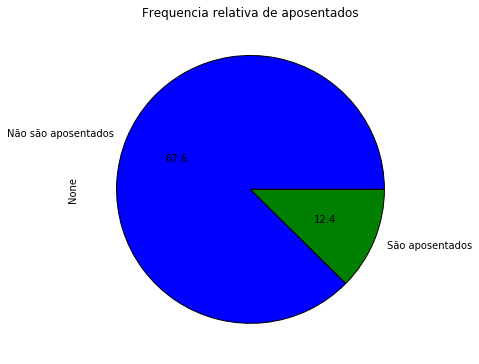

In [435]:
## Gráfico de pizza referente a aposentadoria
plot = ut9.plot(kind='pie',title='Frequencia relativa de aposentados',autopct='%.1f',figsize=(6, 6))

In [381]:
#Tabela cruzada Sexo x Aposentados
ct=pd.crosstab(dados2011.V0302,dados2011.V9122,margins=True,rownames=['SEXO'], colnames=['Aposentados'])
ct

Aposentados,São aposentados,Não são aposentados,All
SEXO,,,
Masculino,18668,130710,173991
Feminino,19719,139519,184928
All,38387,270229,358919


In [402]:
## Com essa tabela percebemos que o número de aposentados do sexo masculino e do sexo feminino é muito similar, diferentemente dos dados analizados acima.

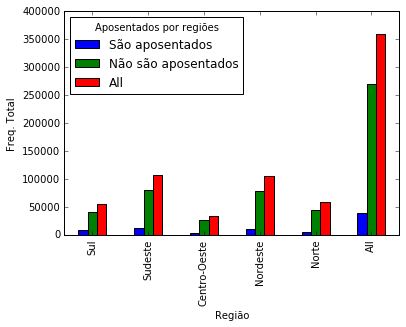

In [335]:
## Agora plotei um gráfico cruzando a informação dos aposentados por regiões (deixando o sexo de lado já que não influencia tanto nessa analize)
ct9 = pd.crosstab(da.regiao,b,margins=True,rownames=['Região'], colnames=['Aposentados por regiões'])
plot = ct9.plot(kind='bar')
plt.ylabel('Freq. Total')

In [407]:
## Esse gráfico é importante pois nos permiti perceber em que regiões existem mais aposentados (nesse caso no sudeste e no nordeste)

In [403]:
# Variavel quantitava- renda recebida pelos aposentados em 2011 aqui estamos pegando quantas pessoas recebem certa quantidade de dinheiro , para não ficar tão disperso ( 1 pessoa recebendo 100 , 2 recebendo 300 por exemplo) é necessário criar faixas sobre a renda
faixa_renda5 = np.arange (5,10000,1000)
ren5= pd.cut(dados2011.V1252, faixa_renda5)

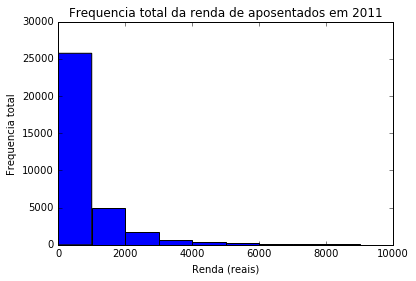

In [338]:
## Histograma frequencia total da renda de aposentados em 2011
plot = dados2011.V1252.plot.hist(bins=faixa_renda5)
plt.title('Frequencia total da renda de aposentados em 2011')
plt.xlabel('Renda (reais)')
plt.ylabel('Frequencia total')

In [ ]:
## Novamente a renda Média do grupo analizado foi muito baixa mas a distribuição foi parecida
## Comparando os dois gráficos pude perceber que a renda dos aposentados é um pouco maior do que as do que recebem renda do governo por outro motivo.

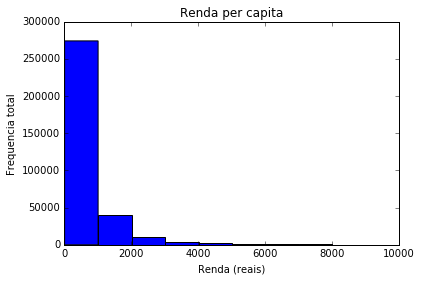

In [368]:
## Outro fator que decidi analizar é a renda per capita para comparar-la com a dos aposentados posteriormente

ren3= pd.cut(dados2011.V4742, faixa_renda3)
ren3.value_counts()
plot = dados2011.V4742.plot.hist(bins=faixa_renda5)
plt.title('Renda per capita')
plt.xlabel('Renda (reais)')
plt.ylabel('Frequencia total')

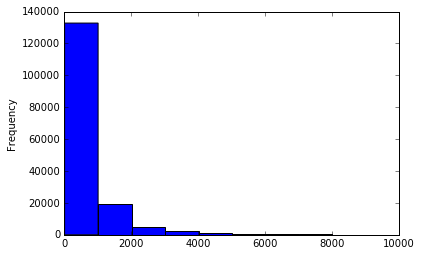

In [378]:
##Agora plotei o mesmo histograma de renda por capita mas somente para as pessoas do sexo masculino
plot = dados2011[dados2011.V0302 == "Masculino"].V4742.plot.hist(bins=faixa_renda5)

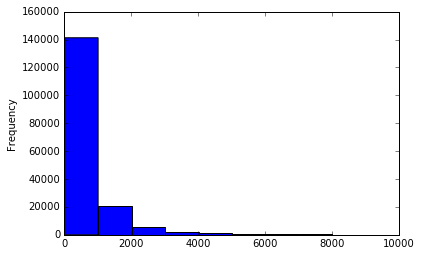

In [379]:
##Agora plotei o mesmo histograma de renda por capita mas somente para as pessoas do sexo feminino e os resultados foram muito parecidos: 
## Renda média baixa porem sem muita disperção, além disso a renda é muito semelhante a dos aposentados
plot = dados2011[dados2011.V0302 == "Feminino"].V4742.plot.hist(bins=faixa_renda5)

# Agora analizaremos os mesmos fatores porem com mais atenção em 2014 para ver se houve alguma melhora

In [234]:
dados2014.shape


(362627, 342)

In [235]:
n=dados2014.shape[0]

In [236]:
#Aqui separei novamente os estados pelas regiões só que dessa vez no PNAD 2014

d = pd.DataFrame()
d['regiao'] = dados2014.UF

d.regiao[(dados2014.UF >= 40) & (dados2014.UF < 50)] = 1
d.regiao[(dados2014.UF >= 30) & (dados2014.UF < 40)] = 2
d.regiao[(dados2014.UF >= 50) & (dados2014.UF < 60)] = 3
d.regiao[(dados2014.UF >= 20) & (dados2014.UF < 30)] = 4
d.regiao[(dados2014.UF >= 10) & (dados2014.UF < 20)] = 5


d.regiao.value_counts()
d.regiao = d.regiao.astype('category')
d.regiao.cat.categories = ('Sul','Sudeste','Centro-Oeste','Nordeste','Norte')

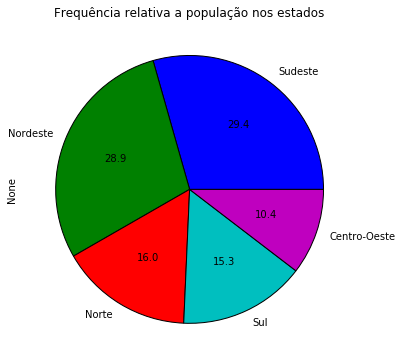

In [410]:
ut7 = (d.regiao.value_counts()/n*100).round(decimals=1)
plot = ut7.plot(kind='pie',title='Frequência relativa a população nos estados',autopct='%.1f',figsize=(6, 6))

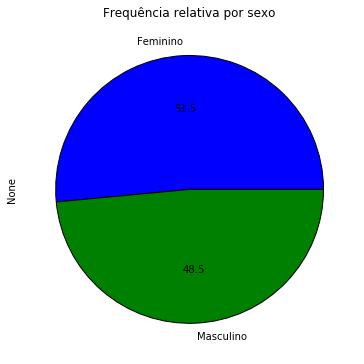

In [411]:
## Agora separei a população por sexo
dados2014.V0302.value_counts()
dados2014.V0302 = dados2014.V0302.astype("category")
dados2014.V0302.cat.categories = ("Masculino","Feminino")
#Frequencia relativa dos sexos em 2011
ut10 = (dados2014.V0302.value_counts()/n*100).round(decimals=1)
plot = ut10.plot(kind='pie',title='Frequência relativa por sexo',autopct='%.1f',figsize=(6, 6))

In [317]:
#V9124 = recebe renda do governo sem ser de aposentadoria ou trabalho 
dados2014.V9124.value_counts() 
dados2014.V9124 = dados2014.V9124.astype("category")
dados2014.V9124.cat.categories = ("Recebem renda sem ser por trabalho ou aposentadoria","Não recebem renda sem ser por trabalho")

In [412]:
b = dados2014.V9124[~dados2014.V9124.isnull()]
ut1 = (b.value_counts(True)*100).round(decimals=1)

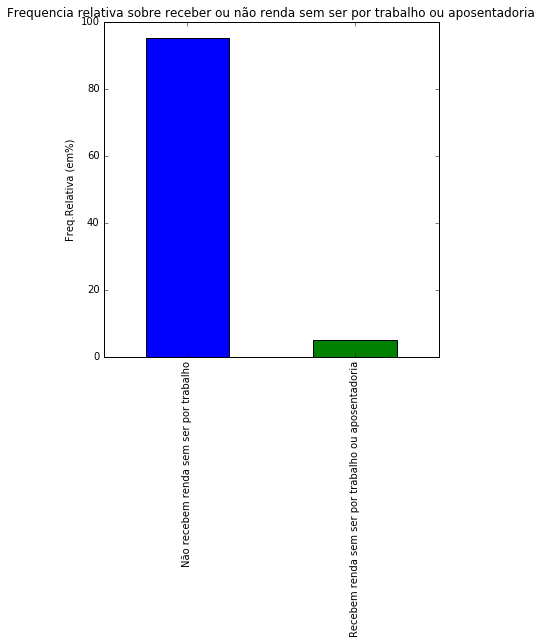

In [319]:
#Grafico de barras da frequencia relativa sobre receber ou não renda sem ser por trabalho ou aposentadoria
plot= ut1.plot(kind="bar", title = "Frequencia relativa sobre receber ou não renda sem ser por trabalho ou aposentadoria", figsize = (6,6), color = ("b", "g"))
plt.ylabel ("Freq.Relativa (em%)")



Renda,Recebem renda sem ser por trabalho ou aposentadoria,Não recebem renda sem ser por trabalho,All
SEXO,,,
Masculino,4746,124973,175748
Feminino,8347,126447,186879
All,13093,251420,362627


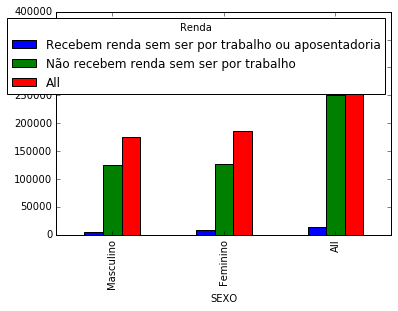

In [383]:
#Tabela cruzada Sexo x Receber ou não renda sem ser por trabalho ou aposentadoria
ct=pd.crosstab(dados2014.V0302,dados2014.V9124,margins=True,rownames=['SEXO'], colnames=['Renda'])
plot = ct.plot(kind='bar')
ct

In [ ]:
##Novamente o número de mulheres que recebem renda é maior do que o de homens (percebemos isso na tabela) mas comparado com o número
##total essa diferença não é relativamente grande

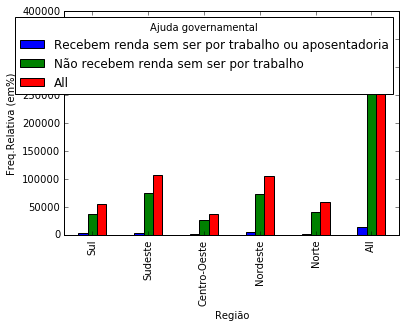

In [320]:
## Gráfico de barras separando as pessoas que recebem renda ou não do governo pelas regiões visando perceber as regiões com maior número de pessoas com essas características
ct1 = pd.crosstab(d.regiao,dados2014.V9124,margins=True,rownames=['Região'], colnames=['Ajuda governamental'])
plot = ct1.plot(kind='bar')
plt.ylabel('Freq.Relativa (em%)')

In [413]:
## o isnull serve para tirar as pessoas não aplicaveis da pesquisa para elas não influenciarem no resultado
dados2014 = dados2014[(dados2014.V1255!=999999999999) & (~dados2014.V1255.isnull()) ]

In [414]:
##Novamente é necessario separar  a renda em faixas
faixa_renda = np.arange (5,10000,1000)
ren= pd.cut(dados2014.V1255, faixa_renda)

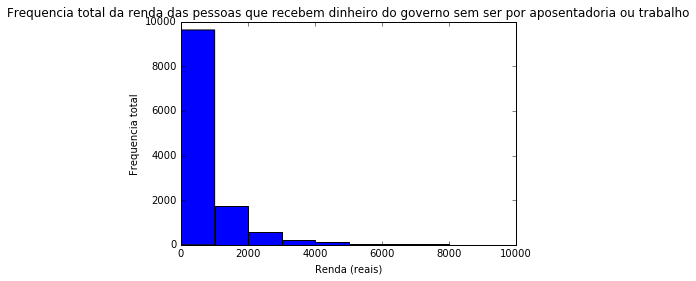

In [415]:
## histograma da renda das pessoas que recebem dinheiro do governo sem ser por aposentadoria ou trabalho
plot = dados2014.V1255.plot.hist(bins=faixa_renda)
plt.title('Frequencia total da renda das pessoas que recebem dinheiro do governo sem ser por aposentadoria ou trabalho')
plt.xlabel('Renda (reais)')
plt.ylabel('Frequencia total')

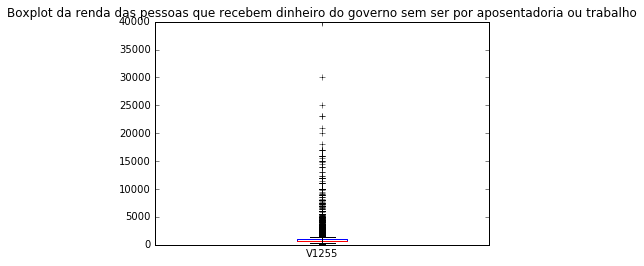

In [416]:
## Boxplot das pessoas que recebem dinheiro do governo sem ser por aposentadoria ou trabalho
plot = dados2014.V1255.plot.box()
plt.title('Boxplot da renda das pessoas que recebem dinheiro do governo sem ser por aposentadoria ou trabalho')


In [417]:
## Com esse histograma e com esse boxplot podemos perceber que a grande maioria das pessoas recebem uma quantia muito pequena de dinheiro mas que ainda existem poucas pessoas recebendo um grande quantidade monetária

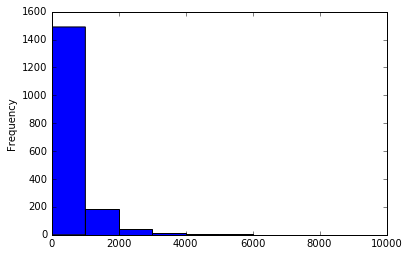

In [388]:
## histograma da renda dos homens que recebem dinheiro do governo sem ser por aposentadoria ou trabalho
plot = dados2014[dados2014.V0302 == "Masculino"].V1255.plot.hist(bins=faixa_renda5)

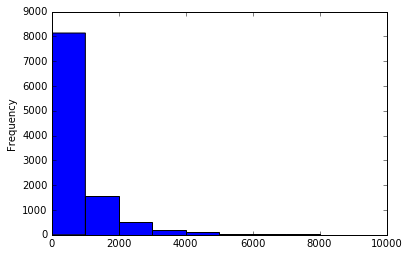

In [389]:
## histograma da renda das mulheres que recebem dinheiro do governo sem ser por aposentadoria ou trabalho
plot = dados2014[dados2014.V0302 == "Feminino"].V1255.plot.hist(bins=faixa_renda5)

In [418]:
## O objetivo de plotar esses dois histogramas é justamente comparar para ver se há alguma diferença significativa na quantia recebida pelas mulheres e pelos homens e a resposta é : não

In [248]:
## Pegando essa variável de renda e à dividindo pelas regiões
N_ra = dados2014[d.regiao == "Norte"].V1255
S_ra = dados2014[d.regiao == "Sul"].V1255
Ne_ra = dados2014[d.regiao == "Nordeste"].V1255
Se_ra = dados2014[d.regiao == "Sudeste"].V1255
CO_ra = dados2014[d.regiao == "Centro-Oeste"].V1255

C:\Users\Asus Pro\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


C:\Users\Asus Pro\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


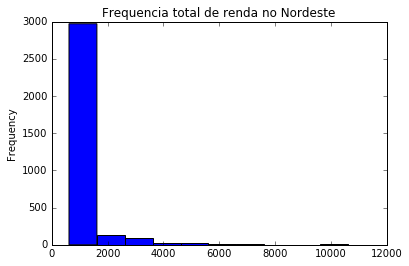

In [249]:
## histograma da renda das pessoas que recebem dinheiro do governo sem ser por aposentadoria ou trabalho DO NORDESTE
plot = dados2014[d.regiao =="Nordeste"].V1255.plot.hist(bins=faixa_renda2)
plt.title('Frequencia total de renda no Nordeste')

In [258]:
dados2014.V1251.value_counts()
dados2014.V1251 = dados2014.V1251.astype("category")
dados2014.V1251.cat.categories = ("Existi rendimento de aposentadoria ")

C:\Users\Asus Pro\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


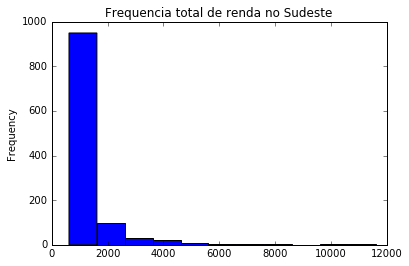

In [259]:
## histograma da renda das pessoas que recebem dinheiro do governo sem ser por aposentadoria ou trabalho DO SUDESTE
plot = dados2014[d.regiao =="Sudeste"].V1255.plot.hist(bins=faixa_renda2)
plt.title('Frequencia total de renda no Sudeste')

In [ ]:
## Essas duas regiões foram escolhidas para serem comparadas pois são as duas com maior poplação e com ela podemos perceber que a renda no Sudeste é maior

In [343]:
## V9122 = são aposentados ou não
dados2014.V9122.value_counts()
dados2014.V9122 = dados2014.V9122.astype("category")
dados2014.V9122.cat.categories = ("São aposentados","Não são aposentados")

In [432]:

ut19 = (c.value_counts(True)*100).round(decimals=1)

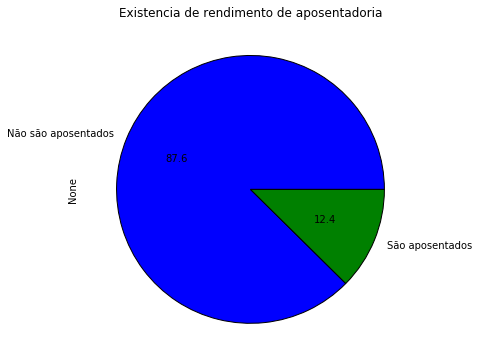

In [433]:
## Gráfico de pizza dos aposentados
plot = ut19.plot(kind='pie',title='Existencia de rendimento de aposentadoria',autopct='%.1f',figsize=(6, 6))

In [ ]:
##Importante ressaltar que a porcentagem de aposentados desde 2011 praticamente não mudou mas que veem diminuindo

In [387]:
## Tabela cruzando os dados de aposentados pelo sexo
ct=pd.crosstab(dados2014.V0302,dados2014.V9122,margins=True,rownames=['SEXO'], colnames=['Aposentadoria'])
ct

Aposentadoria,São aposentados,Não são aposentados,All
SEXO,,,
Masculino,19015,130866,175748
Feminino,19628,142252,186879
All,38643,273118,362627


In [ ]:
##Número praticamete igual de mulheres e homens aposentados o que nos leva a não fazer divisão por sexo para essa categoria

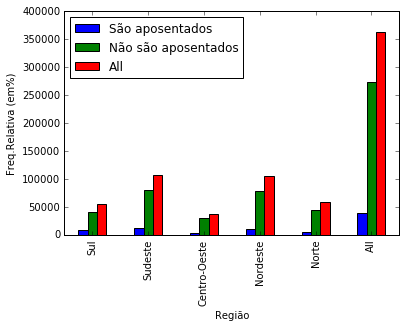

In [350]:
## Aposentados pelas regiões do Brasil
ct2 = pd.crosstab(d.regiao,dados2014.V9122,margins=True,rownames=['Região'], colnames=[''])
plot = ct2.plot(kind='bar')
plt.ylabel('Freq.Relativa (em%)')

In [421]:
## Retirando os não aplicaveis para não alterar o resultado da pesquisa
dados2014 = dados2014[(dados2014.V1252!=999999999999) & (~dados2014.V1252.isnull()) ] ## renda dos aposentados

In [422]:
## Dividindo a renda em faixas
faixa_renda2 = np.arange (620,12000,1000)
ren2= pd.cut(dados2014.V1252, faixa_renda2)

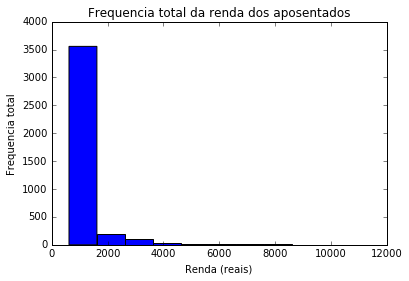

In [423]:
## Histograma da frequência total da renda dos aposentados
plot = dados2014.V1252.plot.hist(bins=faixa_renda2)
plt.title('Frequencia total da renda dos aposentados')
plt.xlabel('Renda (reais)')
plt.ylabel('Frequencia total')

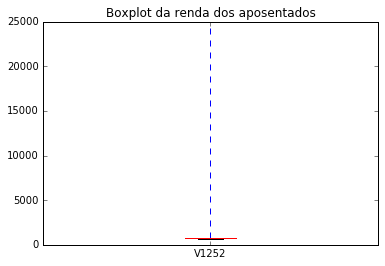

In [424]:
## Boxplot da frequência total da renda dos aposentados
plot = dados2014.V1252.plot.box()
plt.title('Boxplot da renda dos aposentados')


In [ ]:
## Novamente os gráficos mostram o quão baixo é a media de renda

In [267]:
## Dividindo a variavel por regiões
N_ra = dados2014[d.regiao == "Norte"].V1252
S_ra = dados2014[d.regiao == "Sul"].V1252
Ne_ra = dados2014[d.regiao == "Nordeste"].V1252
Se_ra = dados2014[d.regiao == "Sudeste"].V1252
CO_ra = dados2014[d.regiao == "Centro-Oeste"].V1252

C:\Users\Asus Pro\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


C:\Users\Asus Pro\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


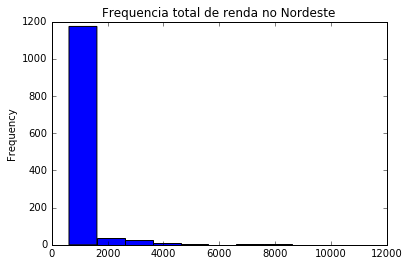

In [268]:
##Plotando o total de renda dos aposentados no Nordeste
plot = dados2014[d.regiao =="Nordeste"].V1252.plot.hist(bins=faixa_renda2)
plt.title('Frequencia total de renda no Nordeste')

C:\Users\Asus Pro\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


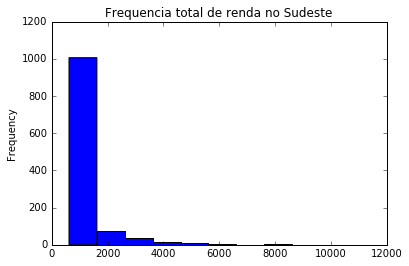

In [269]:
##Plotando o total de renda dos aposentados no Sudeste
plot = dados2014[d.regiao =="Sudeste"].V1252.plot.hist(bins=faixa_renda2)
plt.title('Frequencia total de renda no Sudeste')

In [ ]:
## Esses gráficos mostram que no sudeste mais pessoas recebem mais do que no nordeste

#Agora compararei essas duas rendas com a renda per capita do brasil

In [425]:
## Tirando os não aplicaveis
dados2014 = dados2014[(dados2014.V4742!=999999999999) & (~dados2014.V4742.isnull()) ]

In [426]:
## Dividindo a renda em faixas
faixa_renda3 = np.arange (200,17000,1000)
ren3= pd.cut(dados2014.V4742, faixa_renda3)

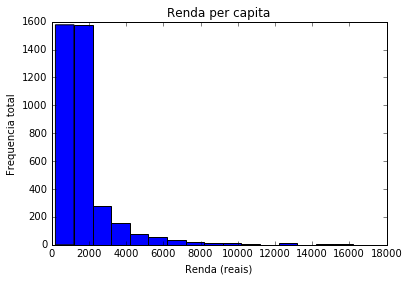

In [272]:
##Plotando um gráfico sobre a renda per capita no Brasil
plot = dados2014.V4742.plot.hist(bins=faixa_renda3)
plt.title('Renda per capita')
plt.xlabel('Renda (reais)')
plt.ylabel('Frequencia total')

In [351]:
N_rc = dados2014[d.regiao == "Norte"].V4742
S_rc = dados2014[d.regiao == "Sul"].V4742
Ne_rc = dados2014[d.regiao == "Nordeste"].V4742
Se_rc = dados2014[d.regiao == "Sudeste"].V4742
CO_rc = dados2014[d.regiao == "Centro-Oeste"].V4742

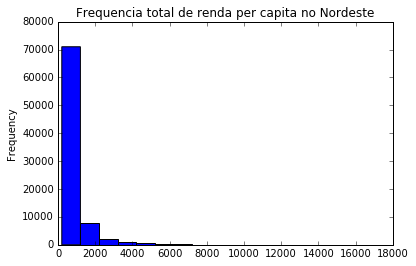

In [352]:
##Plotando um gráfico sobre a renda per capita no Nordeste
plot = dados2014[d.regiao =="Nordeste"].V4742.plot.hist(bins=faixa_renda3)
plt.title('Frequencia total de renda per capita no Nordeste')

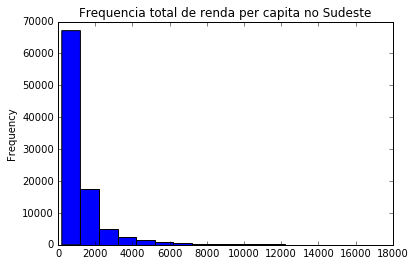

In [353]:
##Plotando um gráfico sobre a renda per capita no Sudeste
plot = dados2014[d.regiao =="Sudeste"].V4742.plot.hist(bins=faixa_renda3)
plt.title('Frequencia total de renda per capita no Sudeste')

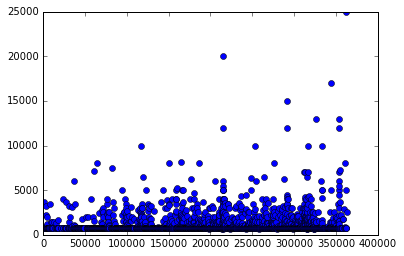

In [428]:
##Gráfico de disperção dos pontos sobre a renda dos aposentados
plt.plot(dados2014.V1252,'o')

In [429]:
## Devido a densidade de pontos baixos percebemos que a maioria das pesssoas recebem uma quantia pequena de dinheiro e devido a poucos pontos muito isolados para cima percebemos que existem algumas pessoas que ganham muito mais do que a média


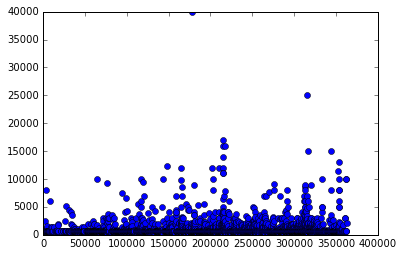

In [430]:
##Gráfico de disperção dos pontos sobre a renda das pessoas que recebem dinheiro do governo sem ser por aposentadoria ou trabalho
plt.plot(dados2014.V1255,'o')

In [ ]:
## Novamente a grande concentração de pessoas ficou quando a renda era baixa e existem pequenas excessões que recebem muito mais

___
## Conclusão 

Descreva aqui suas conclusões!

    Com a analise de todos os gráficos conseguimos tirar diversas conclusões, a primeira é sobre o número total de pessoas que recebem renda do governo sem ser por aposentadoria ou pensão. O número de pessoas nessas condição é muito pequeno se comparado ao número total e dentre eles as mulheres são a maioria.
    Quanto a renda desse grupo fica clara que sua média é baixa mas que existem algumas excessões muito gritantes. De 2011 para 2014 esses dados não mudaram muito, nem em números totais nem em relação a renda, mas se formor detalhistas podemos perceber uma leve melhora na renda.
    Os aposentados, no entanto, não tem uma maioria clara quanto ao sexo então esse não parece ser uma boa variavel para compara-lo. Portanto decidi comparar as regiões do Brasil que tem a maior quantidade de aposentados : o Nordeste e o Sudeste.
    A renda dos aposentados é muito semelhante a da primeira variavel mencionada nessa conclusão, tendo a média baixa e algumas excessões distoantes. Quando comparada por reião podemos perceber uma pequena melhora no sudeste que tem mais pessoas em rendas maiores. Entre 2011 e 2014 o número de aposentados aumentou mas a sua frequencia relativa não, então em números totais mais pessoas passaram a receber uma renda melhor, mas essa afirmação não é verdade em porcentagem. 
    A terçeira variavel analisada foi a renda per capita com a intenção de compara-la com os dois grupos acima e de fato os dois grupos seguem a média de renda do país.
    Gráficos como o boxplot são muito bons para esse tipo de analise pois mostram como a média de renda é baixa mas como existem diversas excessões também. Outros como dispersão de pontos não são tão uteis já que nosso universo amostral é muito grande o que confunde a analise quando posta no gráfico.
    